<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html Project1.do.txt  -->
<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 7 (midnight), 2024 -->

# Project 1 on Machine Learning, deadline October 7 (midnight), 2024
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **September 2**

## Preamble: Note on writing reports, using reference material, AI and other tools

We want you to answer the three different projects by handing in
reports written like a standard scientific/technical report.  The link
at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ProjectWriting/projectwriting.ipynb>
gives some guidance. See also the grading suggestion at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/EvaluationGrading/EvaluationForm.md>.

Furthermore, at
<https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/ReportExample/>
you can find examples of previous reports. How to write reports will
also be discussed during the various lab sessions. Please do ask us if you are in doubt.

When using codes and material from other  sources, you should refer to these in the bibliography of your report, indicating  wherefrom you for example
got the code, whether this is from the lecture notes, softwares like
Scikit-Learn, TensorFlow, PyTorch or  other sources. These should
always be cited correctly. How to cite some of the libraries is often
indicated from their corresponding GitHub sites or websites, see for example how to cite Scikit-Learn at  <https://scikit-learn.org/dev/about.html>. 

We enocurage you to use tools like
[ChatGPT](https://openai.com/chatgpt/) or similar in writing the report. If you use for example ChatGPT,
please do cite it properly and include (if possible) your questions and answers as an addition to the report. This can
be uploaded to for example your website, GitHub/GitLab or similar as supplemental material.

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method.
In addition to the scientific part, in this course we want also to
give you an experience in writing scientific reports.

**A small recommendation when developing the codes here**. Instead of
jumping on to the two-dimensional function described below, we
recommend to do the code development and testing with a simpler
one-dimensional function, similar to those discussed in the exercises
of weeks 35 and 36. A simple test, as discussed during the lectures the first
three weeks is to set the design matrix equal to the identity
matrix. Then your model should give a mean square error which is exactly equal to zero.
When you are sure that your codes function well, you can then replace
the one-dimensional test function with the two-dimensional **Franke** function
discussed here.

The Franke function serves as a stepping stone towards the analysis of
real topographic data. The latter is the last part of this project.

### Description of two-dimensional function

We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.

The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  In a sense, our data are thus scaled to a particular domain for the input values.

Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and a $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as a
resampling technique.  After that we will include the cross-validation
technique.

We can
use a uniform distribution to set up the arrays of values for $x$ and
$y$, or as in the example below just a set of fixed values for $x$ and
$y$ with a given step size.  We will fit a function (for example a
polynomial) of $x$ and $y$.  Thereafter we will repeat much of the
same procedure using the Ridge and Lasso regression methods,
introducing thus a dependence on the bias (penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.

The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

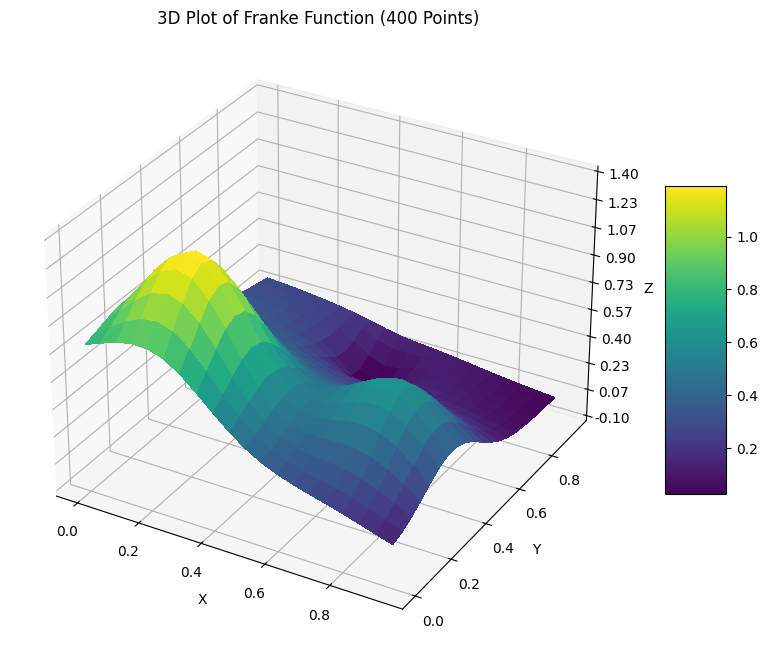

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Make data --> we can increase the number of datapoints and see how the results change.
x = np.arange(0, 1, 0.05) # default = 0.05 
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_title('3D Plot of Franke Function (400 Points)', fontsize=12)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

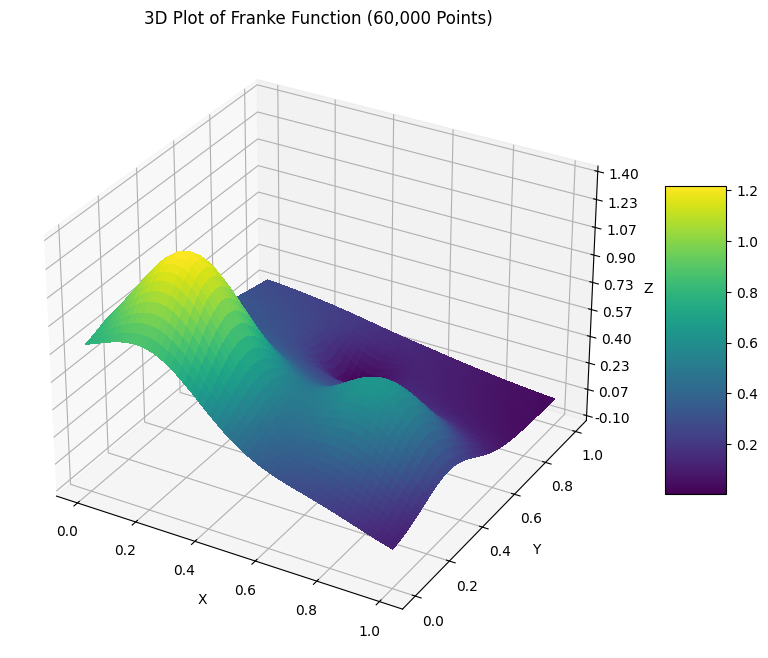

In [3]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Make data. using 60000 data points
x = np.linspace(0, 1, 245)
y = np.linspace(0, 1, 245)

# Create the meshgrid for 245x245 --> essential if we increase the number of x,y
x, y = np.meshgrid(x, y)

def FrankeFunction(x, y):
    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2) ** 2) - 0.25 * ((9 * y - 2) ** 2))
    term2 = 0.75 * np.exp(-((9 * x + 1) ** 2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-(9 * x - 7) ** 2 / 4.0 - 0.25 * ((9 * y - 3) ** 2))
    term4 = -0.2 * np.exp(-(9 * x - 4) ** 2 - (9 * y - 7) ** 2)
    return term1 + term2 + term3 + term4
z = FrankeFunction(x, y)

# Plot
surf = ax.plot_surface(x, y, z, cmap=cm.viridis, linewidth=0, antialiased=False)
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title('3D Plot of Franke Function (60,000 Points)', fontsize=12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

If you wish to compare your results with other on the Franke function or other popular functions tested with linear regression, see the list in Figure 1 of the article by Cook et al at <https://arxiv.org/abs/2401.11694>.

### Part a) : Ordinary Least Square (OLS) on the Franke function

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) and perform a standard **ordinary least square regression**
analysis using polynomials in $x$ and $y$ up to fifth order.

Evaluate the mean Squared error (MSE)

$$
MSE(\boldsymbol{y},\tilde{\boldsymbol{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\boldsymbol{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Plot the resulting scores (MSE and R$^2$) as functions of the polynomial degree (here up to polymial degree five).
Plot also the parameters $\beta$ as you increase the order of the polynomial. Comment your results.

Your code has to include a scaling/centering of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For this exercise you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.

You can easily reuse the solutions to your exercises from week 35 and week 36.
See also the lecture slides from week 35 and week 36.

On scaling, we recommend reading the following section from the scikit-learn software description, see <https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section>.

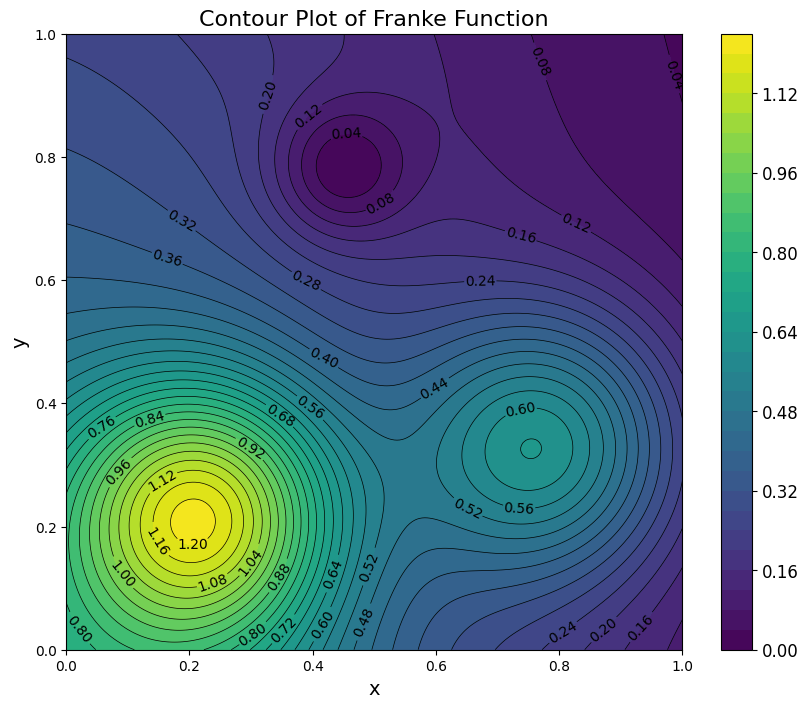

In [4]:
fig, ax = plt.subplots(figsize=(10,8))
contour = ax.contourf(x, y, z, levels=30, cmap=cm.viridis)

# contour lines on top of the filled contours
contour_lines = ax.contour(x, y, z, levels=30, colors='black', linewidths=0.5)

# contour labels
ax.clabel(contour_lines, inline=True, fontsize=10, fmt="%.2f")
ax.set_title('Contour Plot of Franke Function', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)

# ax.grid(True, linestyle='--', alpha=0.6)

cbar = fig.colorbar(contour, ax=ax)
cbar.ax.tick_params(labelsize=12)

ax.set_aspect('equal', 'box')
plt.show()

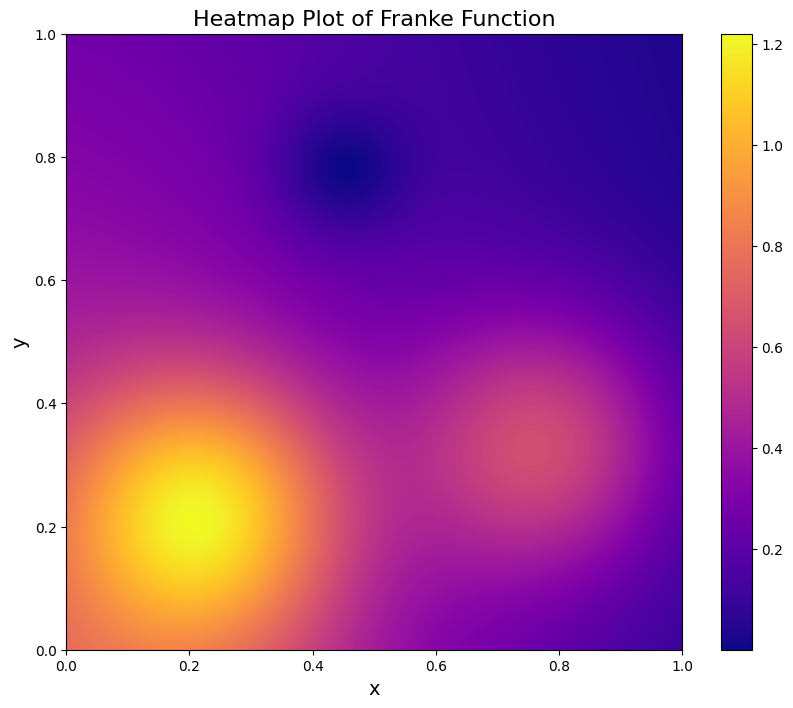

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = ax.imshow(z, extent=[0, 1, 0, 1], origin='lower', cmap='plasma')
ax.set_title('Heatmap Plot of Franke Function', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
fig.colorbar(heatmap, ax=ax)
plt.show()


### Solution (not scaled data)

In [44]:
# first we need to add some noise to our function as request from the exercise

np.random.seed(2745)
n = 100 # --> we add stochastic noise using a normal distrib. N(0,1)
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + 0.1 * np.random.normal(0, 1, n)

In [45]:
# defining a func to create the design matrix

def design_matrix(x, y, degree):
    N = len(x)
    l = int((degree + 1) * (degree + 2) / 2)  # Number of terms in poly
    X = np.ones((N, l)) # --> we use ones matrix as starting point
    idx = 1
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            X[:, idx] = (x**(i-j)) * (y**j)
            idx += 1
    return X

# Create design matrix for fifth-degree polynomial
X_manual = design_matrix(x, y, 5)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

# OLS using matrix inversion
beta_manual = np.linalg.inv(X_manual.T @ X_manual) @ X_manual.T @ z

# Predictions
z_pred_manual = X_manual @ beta_manual
mse_manual = mean_squared_error(z, z_pred_manual)
print(f"Manual OLS Mean Squared Error (MSE): {mse_manual:.5f}")

r2_manual = r2_score(z, z_pred_manual)
print(f"Manual R2: {r2_manual:.5f}")

Manual OLS Mean Squared Error (MSE): 0.00762
Manual R2: 0.88238


In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sklearn implementation
X = np.column_stack((x, y))
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, z)

# Sklearn predictions
z_pred_sklearn = model.predict(X_poly)
mse_sklearn = mean_squared_error(z, z_pred_sklearn)
print(f"Sklearn Mean Squared Error (MSE): {mse_sklearn:.5f}")

r2_sklearn = r2_score(z, z_pred_sklearn)
print(f"Sklearn R2: {r2_sklearn:.5f}")

Sklearn Mean Squared Error (MSE): 0.00762
Sklearn R2: 0.88238


In [48]:
# Compare methods coefficients
print("Manual OLS Coefficients:\n", beta_manual)
print("Sklearn Coefficients:\n", np.concatenate(([model.intercept_], model.coef_)))

Manual OLS Coefficients:
 [  0.34037215   7.35614519   5.47944598 -29.53087433 -30.73250088
  -9.16257193  40.2054822   64.52391155  43.21614293 -10.72666294
 -18.33662729 -55.644933   -50.38428234 -23.45311333  27.72592139
  -0.79499677  22.221866    10.53362964  17.74799304   2.84986883
 -13.36812144]
Sklearn Coefficients:
 [  0.34037215   0.           7.35614522   5.47944596 -29.53087448
 -30.73250088  -9.16257184  40.20548251  64.52391164  43.21614284
 -10.72666311 -18.33662756 -55.64493315 -50.38428231 -23.4531132
  27.72592154  -0.79499668  22.22186607  10.53362964  17.74799303
   2.84986877 -13.36812148]


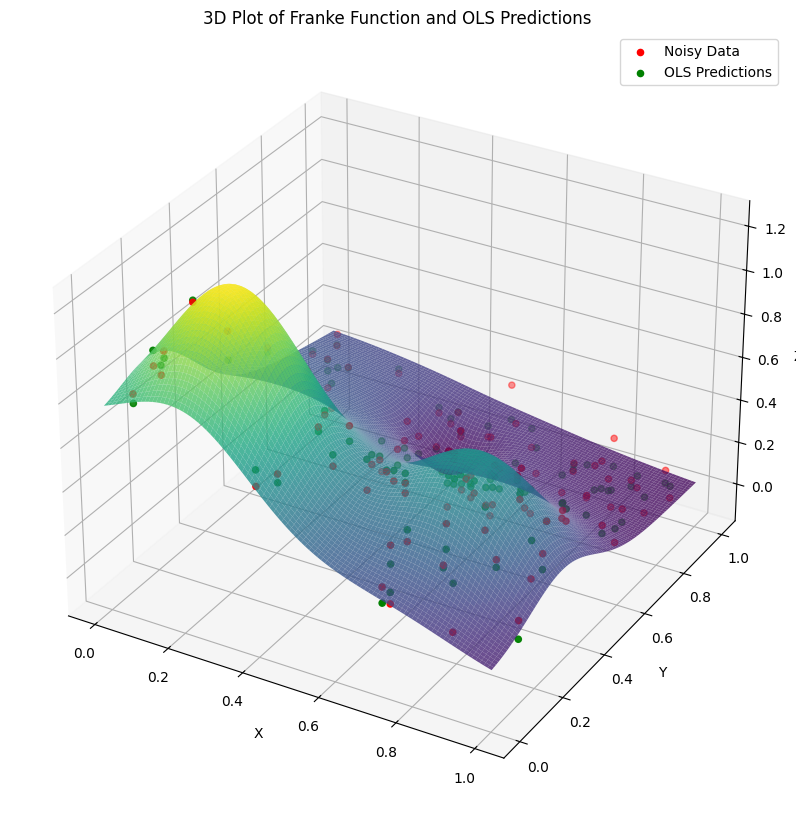

In [49]:
# Plot results
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
z_surf = FrankeFunction(x_surf, y_surf)

ax.plot_surface(x_surf, y_surf, z_surf, cmap='viridis', alpha=0.8, rstride=1, cstride=1)

# Plot the predictions
ax.scatter(x, y, z, color='r', label='Noisy Data') # --> data from Franke's function with noise
ax.scatter(x, y, z_pred_sklearn, color='g', label='OLS Predictions') # --> OLS predictions

ax.set_title('3D Plot of Franke Function and OLS Predictions', fontsize=12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()

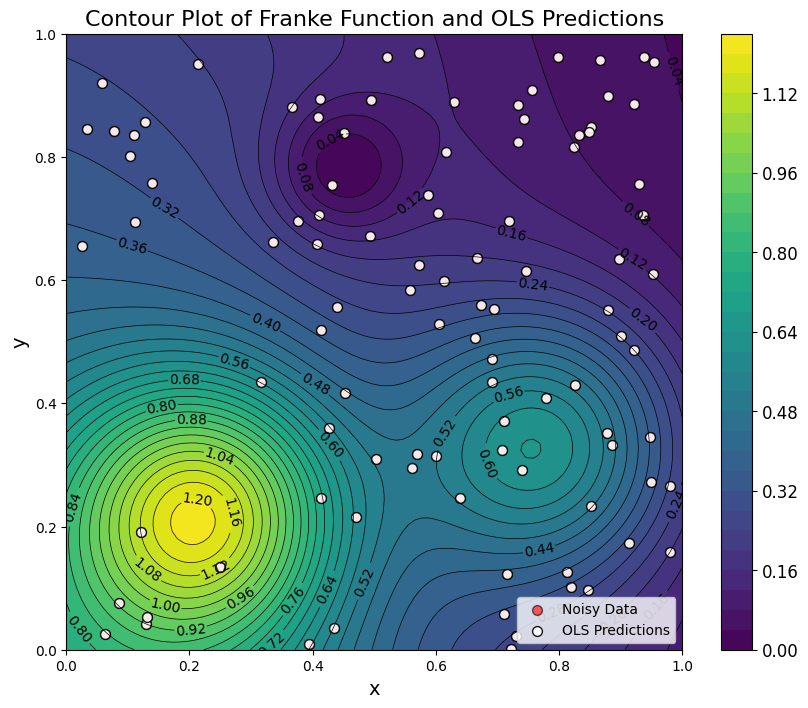

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
z_surf = FrankeFunction(x_surf, y_surf)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(x_surf, y_surf, z_surf, levels=30, cmap=cm.viridis)
contour_lines = ax.contour(x_surf, y_surf, z_surf, levels=30, colors='black', linewidths=0.5)
ax.clabel(contour_lines, inline=True, fontsize=10, fmt="%.2f")
scatter_noisy = ax.scatter(x, y, c='red', s=50, edgecolor='k', label='Noisy Data', alpha=0.6)  # Noisy Data
scatter_ols = ax.scatter(x, y, c='white', s=50,edgecolor='k',  label='OLS Predictions', alpha=0.9)  # OLS Predictions

ax.set_title('Contour Plot of Franke Function and OLS Predictions', fontsize=16)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)

cbar = fig.colorbar(contour, ax=ax)
cbar.ax.tick_params(labelsize=12)
ax.set_aspect('equal', 'box')
ax.legend()
plt.show()


Degree: 1 	 Train R2: 0.6590 	 Test R2: 0.7018
Degree: 2 	 Train R2: 0.7026 	 Test R2: 0.8076
Degree: 3 	 Train R2: 0.8120 	 Test R2: 0.8652
Degree: 4 	 Train R2: 0.8527 	 Test R2: 0.8725
Degree: 5 	 Train R2: 0.8784 	 Test R2: 0.8592
Degree: 6 	 Train R2: 0.8853 	 Test R2: 0.7950
Degree: 7 	 Train R2: 0.8403 	 Test R2: 0.1105
Degree: 8 	 Train R2: 0.8895 	 Test R2: -1.2543
Degree: 9 	 Train R2: 0.7226 	 Test R2: -89.4744
Degree: 10 	 Train R2: 0.9739 	 Test R2: -2525.5079
Degree: 11 	 Train R2: 0.9953 	 Test R2: -1190193.0342
Degree: 12 	 Train R2: 1.0000 	 Test R2: -33845184.8682
Degree: 13 	 Train R2: 1.0000 	 Test R2: -9852230.3981
Degree: 14 	 Train R2: 1.0000 	 Test R2: -2701518.8185
Degree: 15 	 Train R2: 1.0000 	 Test R2: -824554.0069


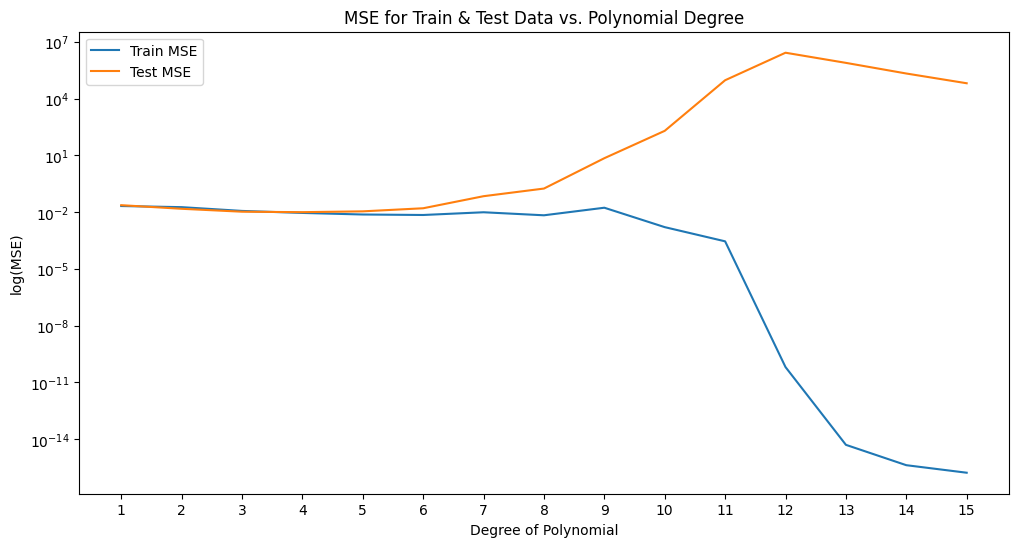

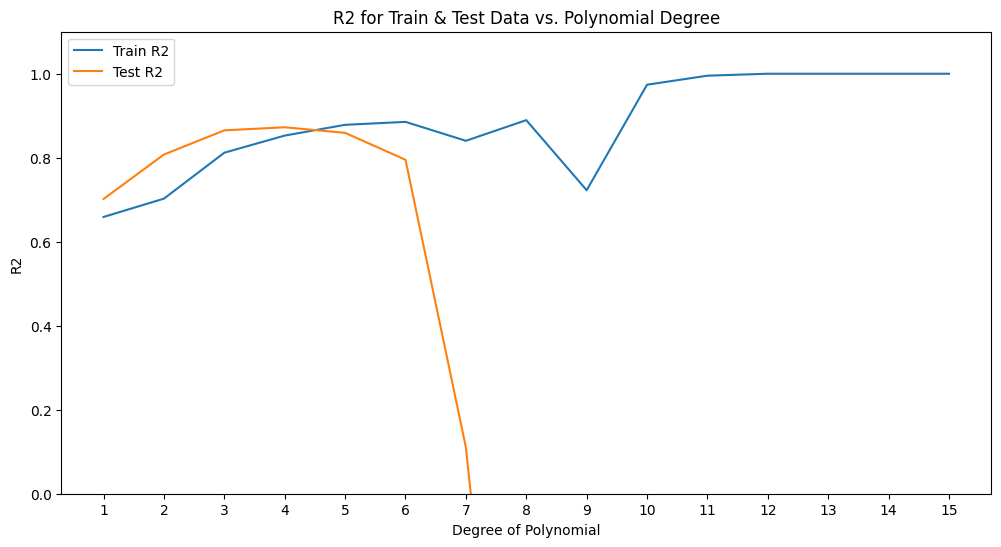

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

max_degree = 15

# Initializing arrays
mse_train_values = []
mse_test_values = []
r2_train_values = []
r2_test_values = []

# Split
X = np.column_stack((x, y)) # --> this is important, we need to merge x and y
X_train, X_test, y_train, y_test = train_test_split(X, z, test_size=0.2, random_state=10)

# Loop iteration
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    
    r2_train_values.append(r2_train)
    r2_test_values.append(r2_test)
    print(f"Degree: {degree} \t Train R2: {r2_train:.4f} \t Test R2: {r2_test:.4f}")

# Plotting MSE Train vs Test
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_degree + 1), mse_train_values, label='Train MSE')
plt.plot(range(1, max_degree + 1), mse_test_values, label='Test MSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('log(MSE)')
plt.xticks(ticks=range(1,16))
plt.title('MSE for Train & Test Data vs. Polynomial Degree')
plt.yscale('log')
plt.legend()
plt.show()

# Plotting R2 Train vs Test
plt.figure(figsize=(12, 6))
plt.plot(range(1, max_degree + 1), r2_train_values, label='Train R2')
plt.plot(range(1, max_degree + 1), r2_test_values, label='Test R2')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R2')
plt.ylim(0, 1.1)
plt.xticks(ticks=range(1,16))
plt.title('R2 for Train & Test Data vs. Polynomial Degree')
plt.legend()
plt.show()

### Conclusions
**MSE Train vs Test**
- As the polynomial degree increases, the training MSE (blue line) consistently decreases, particularly from degrees 9 to 15, indicating that the model becomes better at fitting the training data.
- Conversely, the test MSE (orange line) decreases initially, reaches a minimum, and then increases rapidly beyond degree 6. This pattern indicates that the model starts to overfit the training data, capturing noise and losing its ability to generalize to unseen test data.
- The significant gap between the training and test MSE for degrees higher than 7 is a clear indicator of overfitting.

**R2 Train vs Test**
- For the training set, the R² score (blue line) improves steadily with increasing polynomial degrees, approaching 1 as the model complexity increases. This suggests that the model is capturing all variations in the training data, further confirming overfitting.
- For the test set, the R² (orange line) initially increases, peaks around degree 4, and then drops sharply to zero or negative values around degree 7. A negative R² indicates that the model is performing worse than a simple mean predictor.
- This sharp drop in the test R² score is aligned with the observed increase in test MSE, highlighting a strong overfitting effect.

The analysis suggests that a polynomial degree around 4-6 offers the best trade-off between bias and variance for this dataset, as indicated by the minimal test MSE and stable test R² values.


Also Hastie et al. emphasize that as the model complexity increases (e.g., by using higher-degree polynomials), the variance of the model increases, while the bias decreases. This trend is evident in the MSE plot, where the training MSE decreases with higher polynomial degrees, showing low bias. However, the corresponding test MSE starts to increase, indicating high variance and overfitting.

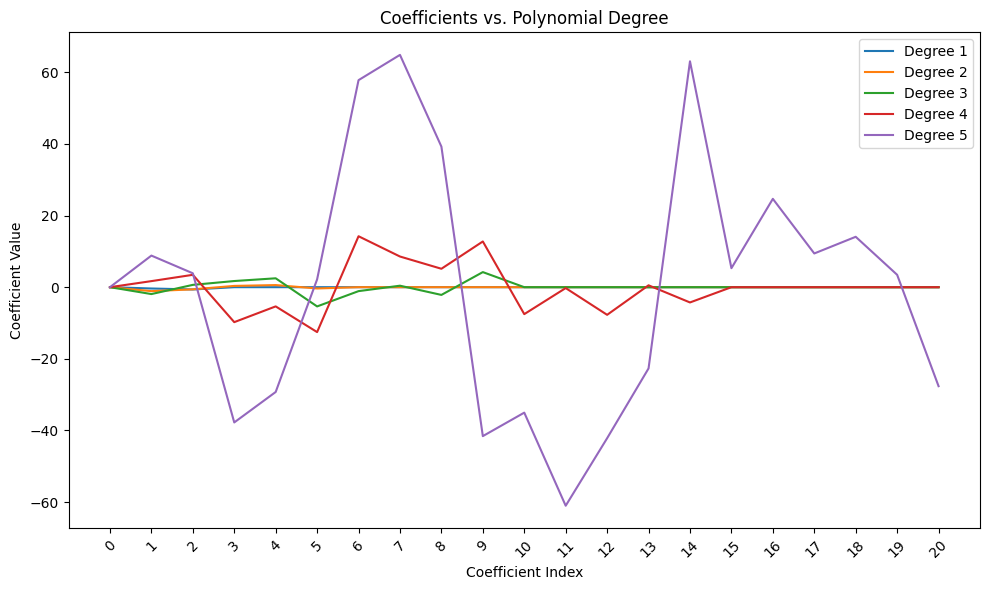

In [52]:
max_degree = 5
coefficients = []

# Loop 
for degree in range(1, max_degree + 1):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    coefficients.append(model.coef_)


# Convert coefficients to a numpy array
max_coefficients_length = max(len(coef) for coef in coefficients)
padded_coefficients = [np.pad(coef, (0, max_coefficients_length - len(coef)), 'constant') for coef in coefficients]
padded_coefficients = np.array(padded_coefficients)

# Plot
plt.figure(figsize=(10, 6))
for i in range(max_degree):
    plt.plot(range(len(padded_coefficients[i])), padded_coefficients[i], label=f'Degree {i + 1}')
    
plt.xticks(ticks=range(len(padded_coefficients[0])), labels=range(len(padded_coefficients[0])), rotation=45)

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients vs. Polynomial Degree')
plt.legend()
# plt.grid(axis='x')
plt.tight_layout()
plt.show()

### Solution (Scaled)

In [53]:
# first we need to add some noise to our function as request from the exercise

np.random.seed(2745)
n = 100 # --> we add stochastic noise using a normal distrib. N(0,1)
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + np.random.normal(0, 0.1, n)

In [54]:
# defining a func to create the design matrix
def design_matrix(x, y, degree):
    N = len(x)
    l = int((degree + 1) * (degree + 2) / 2)  # Number of terms in poly
    X = np.ones((N, l)) # --> we use ones matrix as starting point
    idx = 1
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            X[:, idx] = (x**(i-j)) * (y**j)
            idx += 1
    return X

# Create design matrix for fifth-degree polynomial
X_manual = design_matrix(x, y, 5)

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_mean = np.mean(X_train_poly, axis=0)

X_train_scaled = X_train_poly - X_train_mean
X_test_scaled = X_test_poly - X_train_mean 

y_scaler = np.mean(y_train)

y_train_scaled = y_train - y_scaler
y_test_scaled = y_test - y_scaler

print( X_train_mean)

[1.         0.59028797 0.56696947 0.42435272 0.3294949  0.40969603
 0.32876929 0.23611774 0.2343322  0.32245095 0.26609691 0.1829276
 0.16772215 0.18326735 0.265692   0.22200001 0.14830624 0.13006477
 0.13145284 0.15102847 0.22530356]


In [56]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train_poly)
X_test_scaled = scaler_X.transform(X_test_poly)
print(scaler_X.mean_)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

[1.         0.59028797 0.56696947 0.42435272 0.3294949  0.40969603
 0.32876929 0.23611774 0.2343322  0.32245095 0.26609691 0.1829276
 0.16772215 0.18326735 0.265692   0.22200001 0.14830624 0.13006477
 0.13145284 0.15102847 0.22530356]


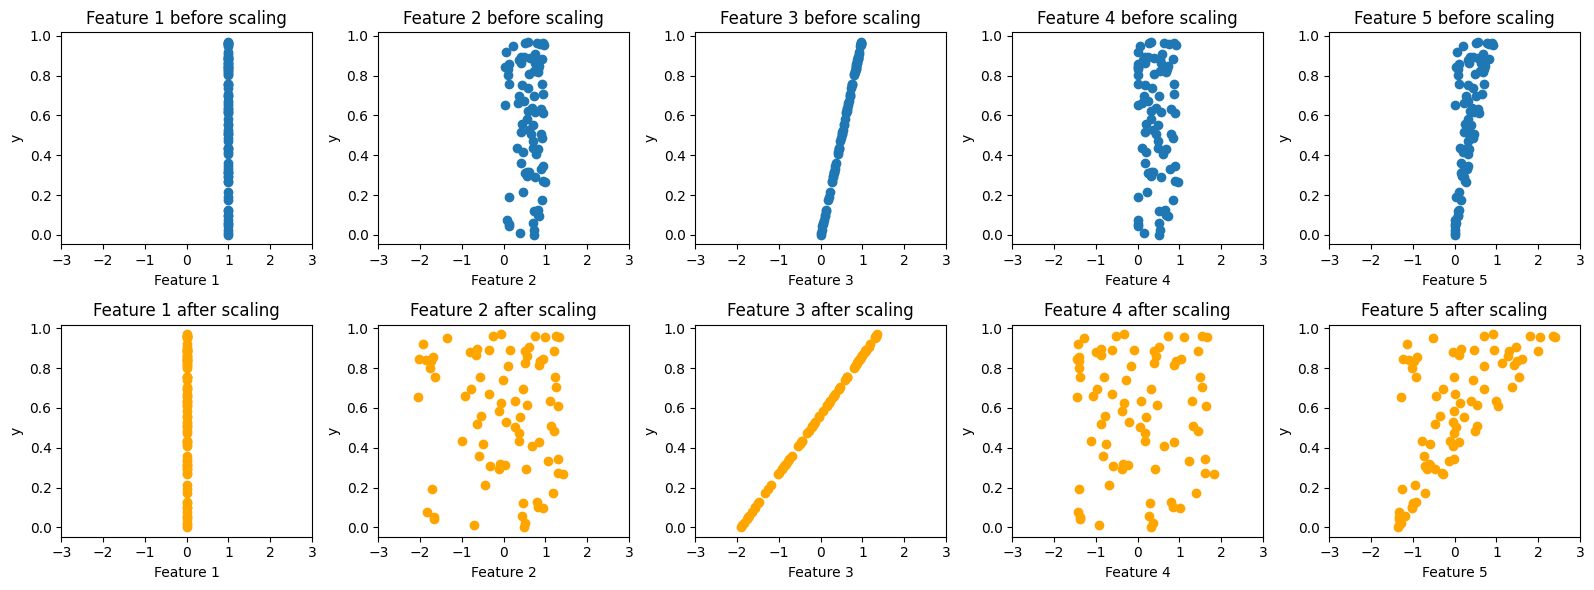

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_poly and y_train are already defined

# Plot before scaling
n_features = 5
plt.figure(figsize=(16, 6))
x_limits = [(-3, 3)] * 5

for i in range(n_features):
    plt.subplot(2, n_features, i + 1)
    plt.scatter(X_train_poly[:, i], y_train, alpha=1)  # Use X_train_poly for polynomial features
    plt.title(f'Feature {i + 1} before scaling')
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('y')
    plt.xlim(x_limits[i])

# Plot after scaling
for i in range(n_features):
    plt.subplot(2, n_features, n_features + i + 1)
    plt.scatter(X_train_scaled[:, i], y_train, alpha=1, color='orange')  # Use scaled features
    plt.title(f'Feature {i + 1} after scaling')
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('y')
    plt.xlim(x_limits[i])

plt.tight_layout()
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X = np.column_stack((x, y))  # remember that z = f(x,y)

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=42)

# Scaling only on X (xy)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Scaling on z
scaler_z = StandardScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

# Model
model = LinearRegression()
model.fit(X_train_poly, z_train_scaled)

z_train_pred_scaled = model.predict(X_train_poly)
z_test_pred_scaled = model.predict(X_test_poly)

# Re-scaling
z_train_pred = scaler_z.inverse_transform(z_train_pred_scaled.reshape(-1, 1)).ravel()
z_test_pred = scaler_z.inverse_transform(z_test_pred_scaled.reshape(-1, 1)).ravel()

# eval
train_mse = mean_squared_error(z_train, z_train_pred)
test_mse = mean_squared_error(z_test, z_test_pred)
train_r2 = r2_score(z_train, z_train_pred)
test_r2 = r2_score(z_test, z_test_pred)

print(f"Train MSE:\t {train_mse:.5f}")
print(f"Train R2:\t {train_r2:.5f}")
print(f"Test MSE:\t {test_mse:.5f}")
print(f"Test R2:\t {test_r2:.5f}")

Train MSE:	 0.00687
Train R2:	 0.87911
Test MSE:	 0.01295
Test R2:	 0.85189


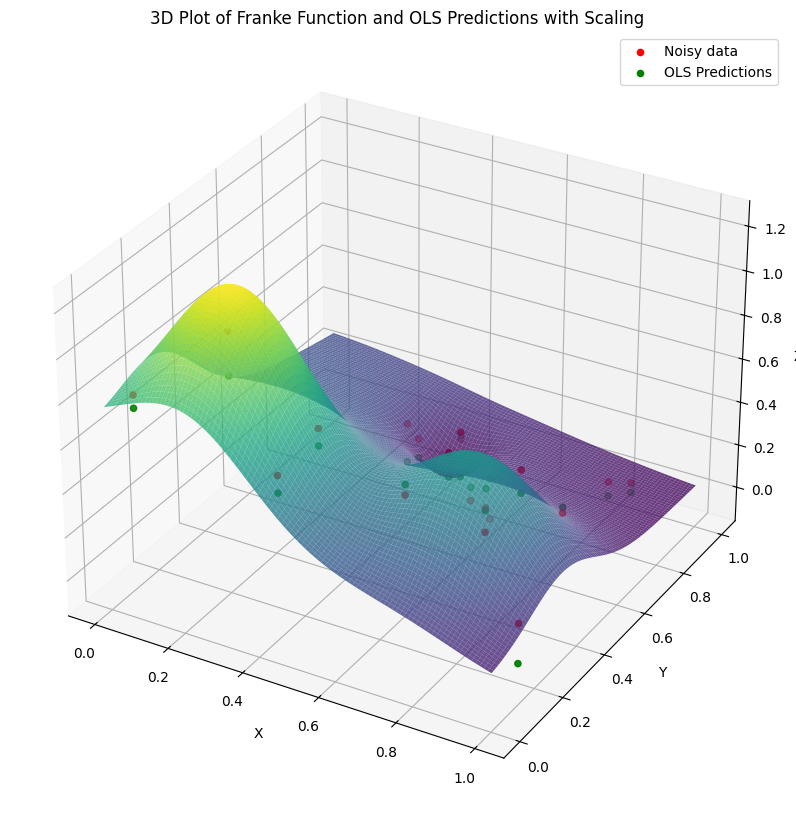

In [59]:
# Plot the results
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d')
x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
z_surf = FrankeFunction(x_surf, y_surf)

ax.plot_surface(x_surf, y_surf, z_surf, cmap='viridis', alpha=0.8, rstride=1, cstride=1)

ax.scatter(X_test[:, 0], X_test[:, 1], z_test, color='r', label='Noisy data')
ax.scatter(X_test[:, 0], X_test[:, 1], z_test_pred, color='g', label='OLS Predictions')

ax.set_title('3D Plot of Franke Function and OLS Predictions with Scaling', fontsize=12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.legend()
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

X = np.column_stack((x, y))  # remember that z = f(x,y)

# Scaling only on X (xy)
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X_scaled)

# # Scaling on z
# scaler_z = StandardScaler()
# z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).ravel()
# z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).ravel()

# Model
model = LinearRegression()
model.fit(X_poly, z)

z_pred = model.predict(X_poly)

# Re-scaling
# z_pred = scaler_z.inverse_transform(z_train_scaled.reshape(-1, 1)).ravel()

# eval
train_mse = mean_squared_error(z, z_pred)
train_r2 = r2_score(z, z_pred)

print(f"Train MSE:\t {train_mse:.5f}")
print(f"Train R2:\t {train_r2:.5f}")

Train MSE:	 0.00762
Train R2:	 0.88238
